# Exercise session on the Langevin equation

**Author:** Pierre de Buyl - http://pdebuyl.be/  
**License:** [CC-BY](http://creativecommons.org/licenses/by/4.0/)

In [3]:
from __future__ import division, print_function
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import math
import random
plt.rcParams['font.size'] = 16

## Velocity and force frequency spectra

For the Langevin equation
$$\dot v = - \gamma v + \xi$$
can be Fourier transformed
$$i \omega \hat v = - \gamma \hat v + \hat \xi$$
and thus solved in frequency space
$$\hat v = \frac{\hat\xi}{\gamma + i \omega}$$

and the relation between the spectra is $S_v(\omega) = S_F(\omega) / (\gamma^2+\omega^2)$

In [2]:
# Langevin equation for the velocity

v = 0
dt = 0.01
gamma = 0.5
D = 1/gamma
v_factor = math.sqrt(2*D*dt)
F_data = []
v_data = []
for t in range(1024*8):
    F = v_factor*random.gauss(0,1)
    v = v*(1-gamma*dt) + F
    F_data.append(F)
    v_data.append(v)
F_data = np.array(F_data)/math.sqrt(dt)
v_data = np.array(v_data)

4.07866308704


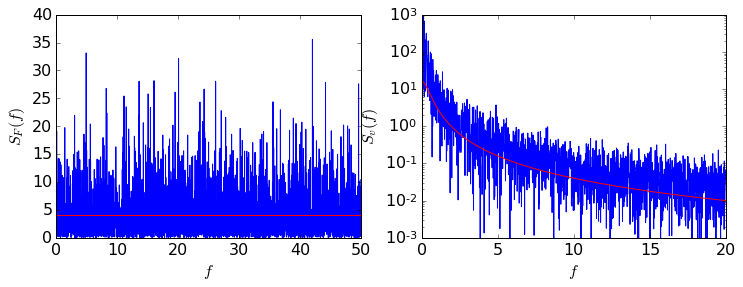

In [3]:
def power_spectrum(data, dt):
    N_samples = len(data)
    t = np.arange(N_samples)*dt
    df = 1/(dt*N_samples)
    y_hat = np.fft.fft(data)/N_samples
    y_hat = y_hat[1:N_samples//2+1]+np.conj(y_hat[-N_samples//2:][::-1])
    s = np.abs(y_hat**2)
    s *= len(s)/2
    return np.arange(len(s))*df, s

plt.figure(figsize=(12, 4))
plt.subplot(121)

f, s = power_spectrum(F_data, dt)
plt.plot(f, s);
plt.axhline(2*D, c='r');
plt.xlabel(r'$f$')
plt.ylabel(r'$S_F(f)$')
print(s.mean())

plt.subplot(122)
f, s = power_spectrum(v_data, dt)
plt.plot(f, s);
plt.plot(f, 2*D/(gamma**2+f**2), c='r')
plt.xlabel(r'$f$')
plt.ylabel(r'$S_v(f)$')
plt.yscale('log')

plt.xlim(0, 20);
plt.ylim(1e-3, 1e3);

## Active Brownian Particles

$$\dot \theta = \xi$$
$$v = v_0 (\cos\theta, \sin\theta)$$
$$\dot x = v$$

In [4]:
# Langevin equation for the velocity

v0 = 1
Dr = 2
th = 0
x = 0
y = 0
dt = 0.01
th_factor = math.sqrt(2*Dr*dt)
xy_factor = v0*dt
xy_data = []
th_data = []
for t in range(100000):
    th = th + th_factor*random.gauss(0,1)
    x = x + math.cos(th)*xy_factor
    y = y + math.sin(th)*xy_factor
    th_data.append(th)
    xy_data.append((x,y))
th_data = np.array(th_data)
xy_data = np.array(xy_data)

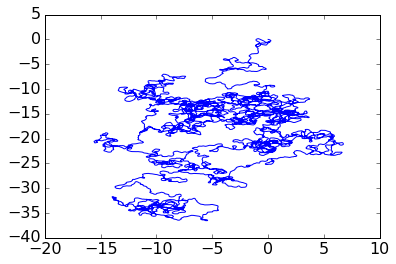

In [5]:
plt.plot(xy_data[:,0], xy_data[:,1]);

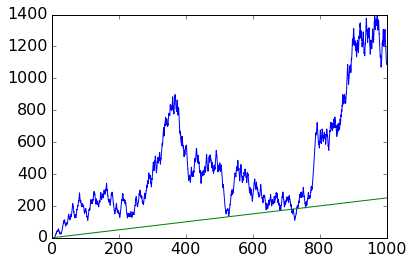

In [6]:
t = dt*np.arange(len(xy_data))
plt.plot(t, np.sum(xy_data**2, axis=1))

plt.plot(t, v0**2/(2*Dr)*t);

## Sedimentation

$$\dot x = - \frac{m g}{\gamma} + \xi$$

In [7]:
# Overdamped Langevin equation for sedimentation

x = 1
dt = 0.01
D = 0.5
g = 0.3
x_factor = math.sqrt(2*D**2*dt)
x_data = []
for t in range(100000):
    x = x - g*D*dt + x_factor*random.gauss(0,1)
    if x<0:
        x = -x
    x_data.append(x)
x_data = np.array(x_data)

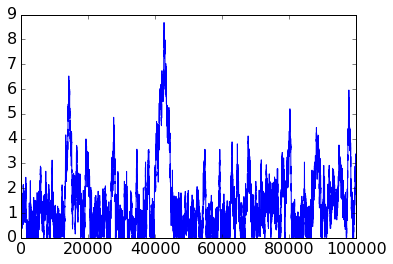

In [8]:
plt.plot(x_data);

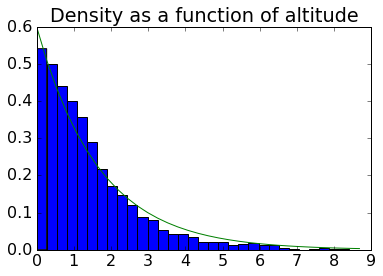

In [9]:
n, bins, patches = plt.hist(x_data, bins=32, normed=True)
#bins = (bins[1:]+bins[:-1])/2
plt.title('Density as a function of altitude')
plt.plot(bins, g/D*np.exp(-bins*g/D));